# Prática 3

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere as duas bases de dados a seguir

- Dados de fechamento do papel PETR4 a partir de 18/3 no arquivo PETR4.csv.

- Dados de mortes por COVID-19 no estado de SP.


Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 3 a esses dados, a saber:

- Função de autocorrelação

- Função de autocorrelação parcial

- Repetir a modelagem para os dados de PETR4 visto em aula.

- Desafio para COVID-19: Um modelo ARIMA sazonal.

**1. Carregue as bibliotecas**

In [49]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)


**2. Faça a leitura dos dados de PETR4 em df1 e de COVID-19 no estado de SP em df2. Para os dados PETR4 usaremos a variável Close e para os dados de COVID-19 usaremos a variável deaths. Complete as bases de dados usando reindex e fillna.**

In [50]:
pkgdir = '/home/cibele/CibelePython/AprendizadoDinamico/Data'

# PETR4 - Leitura dos dados
df1 = pd.read_csv(f'{pkgdir}/PETR4.csv', index_col='Date', parse_dates=True)

idx1 = pd.date_range(start=df1.index.min(), end=df2.index.max(), freq='D')
df1 = df1.reindex(idx1)
df1.fillna(method='ffill', inplace=True)



# COVID-19 no estado de SP
df2 = pd.read_csv(f'{pkgdir}/covidSP.csv', index_col='date', parse_dates=True)

idx2 = pd.date_range(start=df2.index.min(), end=df2.index.max(), freq='D')
df2 = df2.reindex(idx2)
df2.fillna(0,inplace=True)


**3. Verifique graficamente se os dados foram lidos de forma correta.**

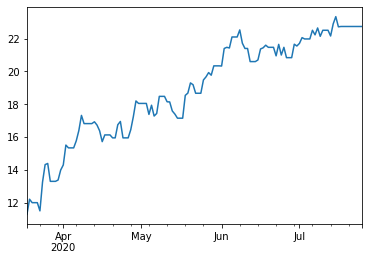

In [51]:
df1['Close'].plot()

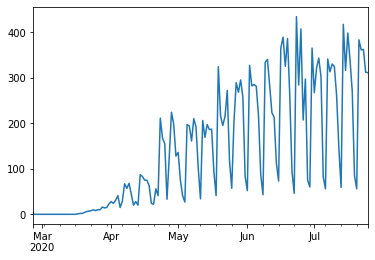

In [52]:
df2['deaths'].plot()

**4. Obtenha os gráficos de autocorrelação e autocorrelação parcial para ambas as aplicações. Que características você observa nesses gráficos? Que modelo sugeriria com base nos correlogramas?**

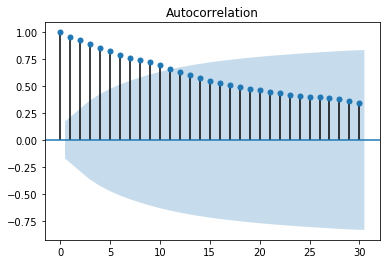

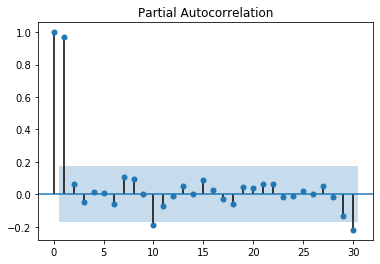

In [53]:
# Correlograma

plot_acf(df1['Close'], lags=30)
plot_pacf(df1['Close'], lags=30)
plt.show()

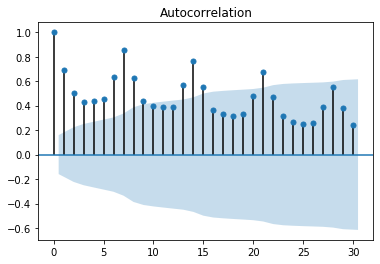

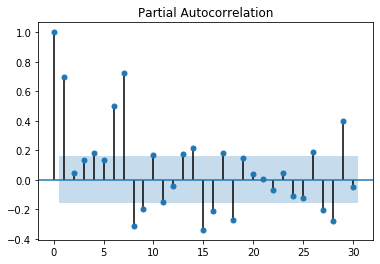

In [54]:

# Correlograma

plot_acf(df2['deaths'], lags=30)
plot_pacf(df2['deaths'], lags=30)
plt.show()

**5. Repita os gráficos de autocorrelação e autocorrelação parcial para a primeira diferença de cada aplicação. O que você pode concluir?**

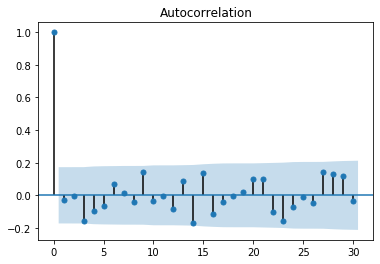

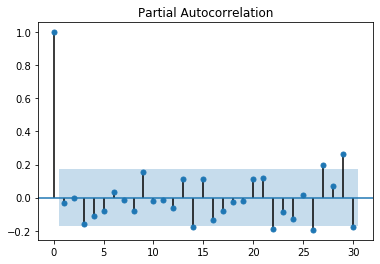

In [55]:
# Correlograma

plot_acf(np.diff(df1['Close']), lags=30)
plot_pacf(np.diff(df1['Close']), lags=30)
plt.show()

/home/cibele/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


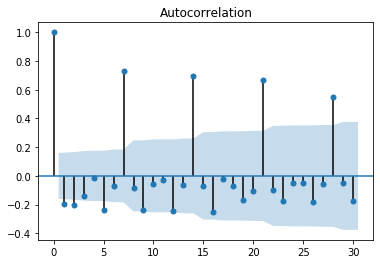

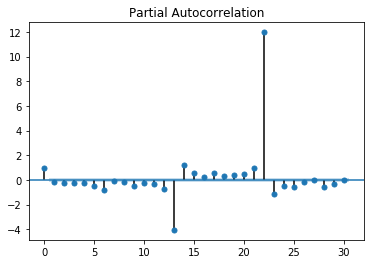

In [56]:
# Correlograma

plot_acf(np.diff(df2['deaths']), lags=30)
plot_pacf(np.diff(df2['deaths']), lags=30)
plt.show()

**6. Para os dados de PETR4, refaça a modelagem vista em aula.**

**7. Desafio: Ainda não vimos o modelo SARIMA, mas já sabemos que a série de COVID-19 tem sazonalidade. Como os dados de COVID-19 apresentam sazonalidade, vamos arriscar no tema da próxima aula? Altere seasonal para True e escolha o melhor modelo entre os SARIMA propostos. Discutiremos com detalhes este modelo na Aula 4.**

In [60]:
stepwise_fit = auto_arima(df2['deaths'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=7,
                          seasonal=True,
                          d=0, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(1,1,1,7) [intercept=True]; AIC=1503.140, BIC=1515.019, Time=0.461 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=1546.346, BIC=1552.285, Time=0.023 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=1506.697, BIC=1518.577, Time=0.418 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=1504.764, BIC=1516.643, Time=0.394 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=1553.312, BIC=1556.281, Time=0.019 seconds
Fit ARIMA(0,0,0)x(0,1,1,7) [intercept=True]; AIC=1505.935, BIC=1514.844, Time=0.261 seconds
Fit ARIMA(0,0,0)x(1,1,0,7) [intercept=True]; AIC=1506.823, BIC=1515.733, Time=0.550 seconds
Fit ARIMA(0,0,0)x(2,1,1,7) [intercept=True]; AIC=1501.191, BIC=1516.040, Time=1.153 seconds
Fit ARIMA(0,0,0)x(2,1,0,7) [intercept=True]; AIC=1500.211, BIC=1512.091, Time=0.795 seconds
Fit ARIMA(1,0,0)x(2,1,0,7) [intercept=True]; AIC=1497.094, BIC=1511.944, Time=1.094 seconds
Fit ARIMA(1,0,0)x(2,1,1,7) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  151
Model:             SARIMAX(4, 0, 0)x(2, 1, 0, 7)   Log Likelihood                -736.359
Date:                           Tue, 28 Jul 2020   AIC                           1488.717
Time:                                   00:28:50   BIC                           1512.476
Sample:                                        0   HQIC                          1498.371
                                           - 151                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.9028      5.491      3.078      0.002       6.140      27.665
ar.L1          0.2212      0.072      3.065      0.002       0.080       0.363
ar.L2          0.1651      0.071      2.325      0.020       0.026       0.304
ar.L3         -0.2270      0.086     -2.652      0.008      -0.395      -0.059
ar.L4          0.1806      0.075      2.412      0.016       0.034       0.327
ar.S.L7       -0.6434      0.073     -8.836      0.000      -0.786      -0.501
ar.S.L14      -0.2184      0.095     -2.288      0.022      -0.406      -0.031
sigma2      1579.5096    162.146      9.741      0.000    1261.709    1897.310
===================================================================================
Ljung-Box (Q):                       31.23   Jarque-Bera (JB):                14.88
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               8.88   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""